# Probabilidades y Estadística (C)

# Practica 6 

---

* Los ejercicios de esta práctica se deben resolver usando R u otro software.

* Los archivos de datos se encuentran en la página de la materia.

2.

>Se quiere estudiar la **distribución de la duración** (en horas) de las lámparas producidas por una fábrica.
>
>Se observa la duración de **27 lámparas elegidas al azar** de la producción de dicha fábrica y se obtienen los siguientes valores, que figuran también en el archivo ***lamparas.txt***.

In [211]:
datos <- scan("./data/practica6/lamparas.txt")
datos

[1]  26,43  33,58  65,86  29,18   5,92  13,29  13,54  64,78  56,11  23,60
[11]  33,39 100,32  28,04  29,63   2,41   3,17  11,99   6,47  23,59  17,96
[21]  32,27   2,09  57,43  15,31  42,85   1,68  49,61

>**a)** **Estimar** la probabilidad de que una lámpara producida por esta fábrica **dure más de 30 horas**.
>
>**b)** **Implementar y graficar** la **función de distribución empírica** de este conjunto de datos.
>
>**c)** **Completar:** *Estos datos permiten estimar que el 90 % de las lámparas producidas
por esta fábrica dura más de **. . . . . .** horas y el 10 % dura menos de **. . . . . .** horas.*

**Obs:**

Hago **a)** y parte de **b)** juntos, para no sacar valores de la galera 🎩

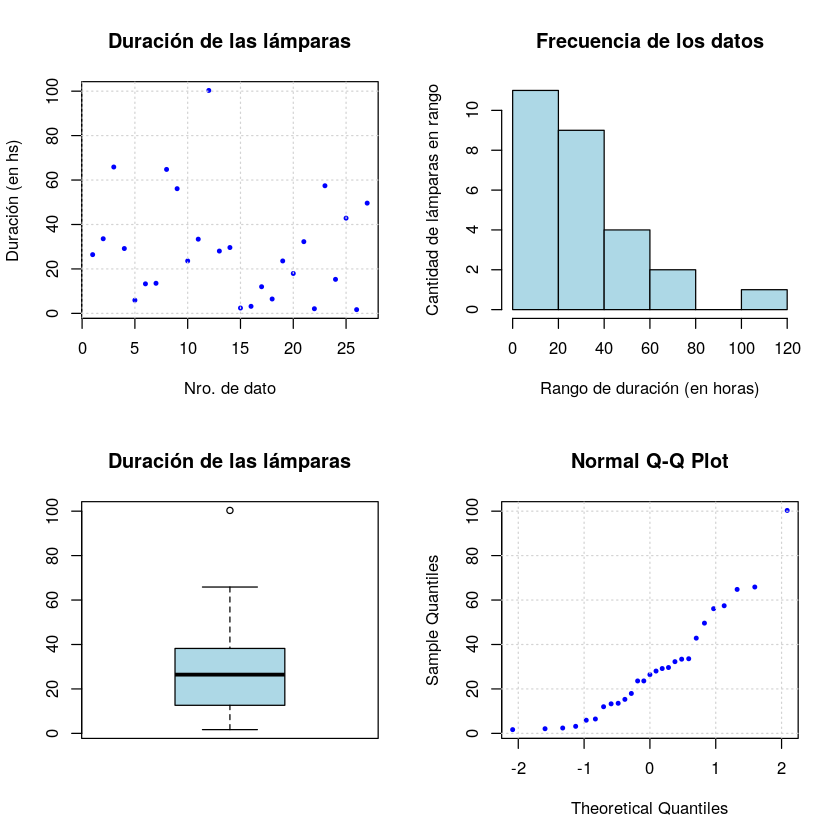

In [212]:
# a) Comienzo por visualizar los datos
#datos[12] <- median(datos)
par( mfrow = c(2,2) )

# Plot eje cartesiano
plot(datos,
     main="Duración de las lámparas",
     xlab="Nro. de dato",
     ylab="Duración (en hs)",
     col="blue", pch=19, cex=0.5)
grid()

# Frecuencia de los datos
hist(datos,
     main="Frecuencia de los datos",
     xlab="Rango de duración (en horas)",
     ylab="Cantidad de lámparas en rango",
     col="lightblue")

# Boxplot de datos
boxplot(datos,
        main="Duración de las lámparas",
        col="lightblue")

# QQ-plot de datos (contra D. Normal)
qqnorm(datos,
       col="blue", pch=19, cex=0.5)
grid()

Similar al gráfico de **Frecuencias**, podemos graficar la **Frecuencia Relativa** de los valores obtenidos, lo cuál llamamos **Función de Densidad Empírica**

https://es.wikipedia.org/wiki/Conocimiento_empírico

Para eso basta dividir la **cantidad** de valores en cada columna por la **cantidad total de elementos** en todo el gráfico.

A ésto lo llamamos ***"Histograma"***.

## Histograma $\equiv$ Estimador de Densidad

Construcción del Histograma:

* Sea la ***muestra*** $Y_n = X_1, X_2, \dots , X_n$ de **variables aleatorias**.
  
  
* Sea la ***realización*** $y_{n} = x_{1},x_{2}, \dots , x_{n}$
  
  Donde ***realización*** son los **datos ($x_i$ en $\mathbb R^d$) obtenidos en un experimento**
  
  
* Sea la ***realización ordenada*** $X_{n} = x_{(1)},x_{(2)}, \dots , x_{(n)}$
  
  
* Sea $I_1, I_2, \dots, I_k$ intervalos 
  
  típicamente $k = \lfloor \sqrt n \rfloor$

Sobre cada intervalo $I_j$ elejimos una $altura_j$ tal que el área $I_j \times altura_j$ sea igual a la **frecuencia relativa** en ese intervalo $I_j$



$$Área \ en \  I_j \equiv Frecuencia \  relativa \ en \ I_j$$

$$|I_j| \times altura_j = \frac {\sum_{i=1}^n \mathbf 1\{x_i \in I_j\}}{n} = \frac {\text{cant. de datos} \in I_j}{\text{cant. total de datos}}$$

De esta forma obtenemos una representación o modelo de frecuencias relativas de los datos.

Como el área de histograma suma $1$, podemos usarlo como **Función de Densidad Empírica**, donde ***Empírica*** hace referencia a que es definida a través de observaciones (en nuestro caso, los `datos`)

In [213]:
sqrt(length(data))

[1] 5,196152

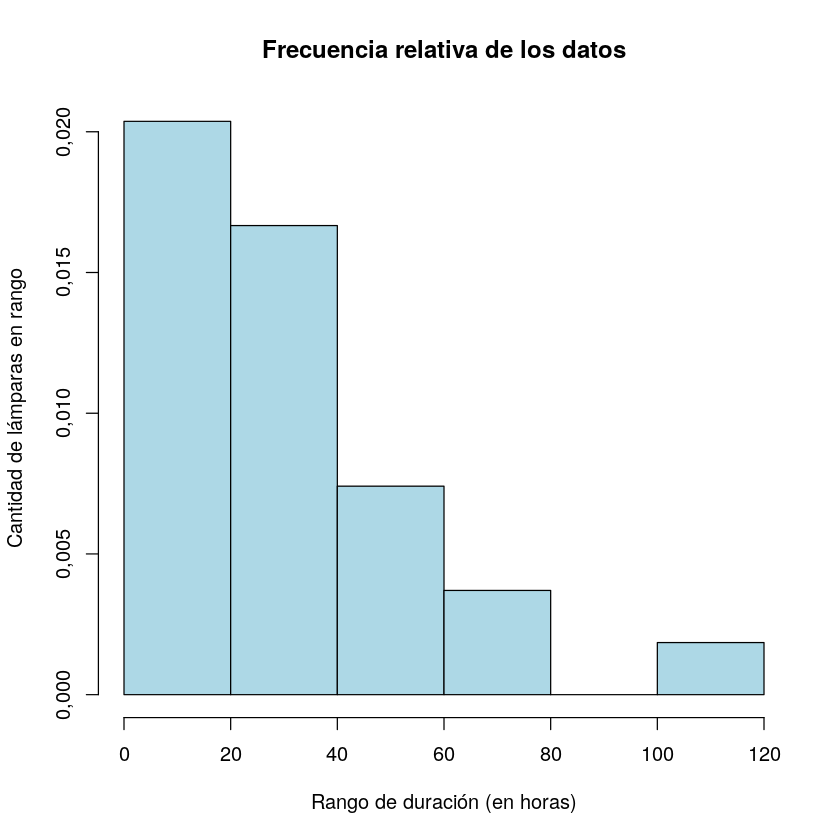

In [214]:
#par(mfrow=c(2,2))
# Histograma
hist(datos,
     main="Frecuencia relativa de los datos",
     xlab="Rango de duración (en horas)",
     ylab="Cantidad de lámparas en rango",
     col="lightblue",
     freq=FALSE,
     breaks=6)

In [216]:
# Frecuencias relativas (a mano)

cantidad_en <- data.frame(
                n_bin = c(1:6),
                bin_desde = seq(0,100,20),
                bin_hasta = seq(20,120,20),
                cant = rep(0,6))

#Guardo cantidades que "caen" en cada bin
cantidad_en$cant[1] <- length( datos[(datos >= 0)   & (datos < 20)])
cantidad_en$cant[2] <- length( datos[(datos >= 20)  & (datos < 40)])
cantidad_en$cant[3] <- length( datos[(datos >= 40)  & (datos < 60)])
cantidad_en$cant[4] <- length( datos[(datos >= 60)  & (datos < 80)])
cantidad_en$cant[5] <- length( datos[(datos >= 80)  & (datos < 100)])
cantidad_en$cant[6] <- length( datos[(datos >= 100) & (datos < 120)])
cantidad_en


n_bin,bin_desde,bin_hasta,cant
1,0,20,11
2,20,40,9
3,40,60,4
4,60,80,2
5,80,100,0
6,100,120,1


[1] "Datos: "


[1]   1,68   2,09   2,41   3,17   5,92   6,47  11,99  13,29  13,54  15,31
[11]  17,96  23,59  23,60  26,43  28,04  29,18  29,63  32,27  33,39  33,58
[21]  42,85  49,61  56,11  57,43  64,78  65,86 100,32

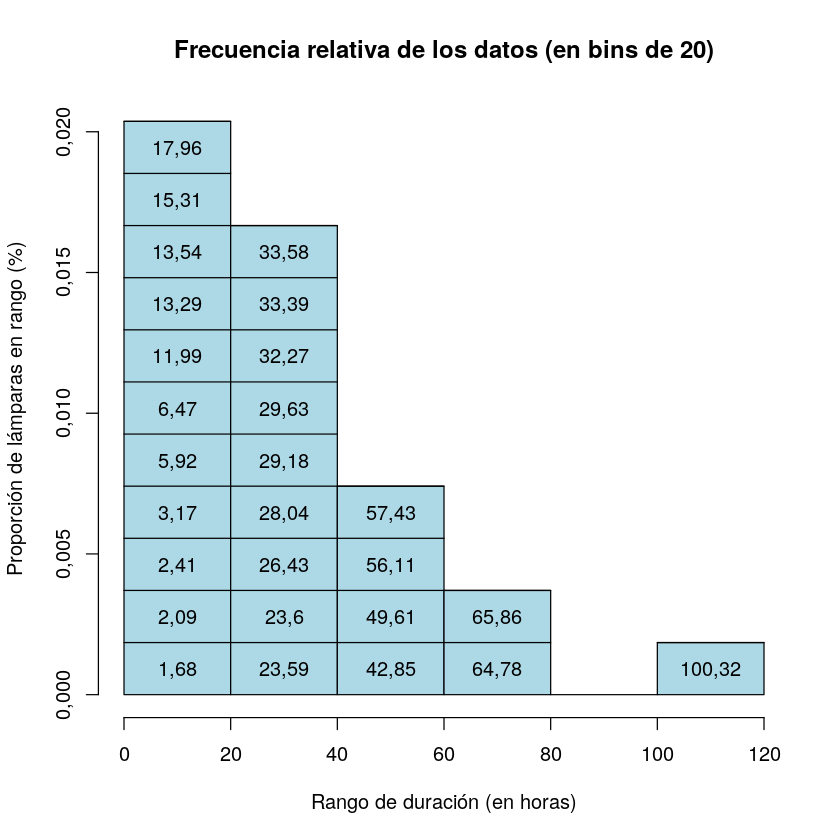

In [217]:
hist(datos,
     main="Frecuencia relativa de los datos (en bins de 20)",
     xlab="Rango de duración (en horas)",
     ylab="Proporción de lámparas en rango (%)",
     col="lightblue",
     freq=FALSE,
     breaks=6)

# Agrego divisiones
contador <- 0
for(n_div in c(1:6)){
    cant <- cantidad_en$cant[n_div]
    desde <- cantidad_en$bin_desde[n_div]
    hasta <- cantidad_en$bin_hasta[n_div]
    if(cant > 0){
        for (i in 1:cant){
            contador <- contador + 1
            # Segmentos para casilleros sobre hist
            segments(x0=desde, x1=hasta,
                     y0=(i * 1/27 * 1/20),
                     y1=(i * 1/27 * 1/20))
            # Etiquetas para casilleros
            text( (desde+hasta)/2, (i * 1/27 * 1/20)-0.001 , sort(data)[contador])
        }
    }
}

print("Datos: ")
sort(data)

Con ésto tenemos una **representación** más gráfica e intuitiva de la **distribución (empírica) de los datos**.

Para obtener la ***probabilidad de que una lámpara dure más que 30 hs***, basta con **contar** la cantidad de **datos mayores a 30hs**, y **dividirlos** por la **cantidad total de datos**.

Otra forma podría ser **usando la función de densidad empírica** graficada arriba (como un histograma), **integrando de 30 en adelante**, o equivalentemente, sumando áreas.

In [218]:
# Datos
datos

[1]  26,43  33,58  65,86  29,18   5,92  13,29  13,54  64,78  56,11  23,60
[11]  33,39 100,32  28,04  29,63   2,41   3,17  11,99   6,47  23,59  17,96
[21]  32,27   2,09  57,43  15,31  42,85   1,68  49,61

In [219]:
# Datos mayores a 30 (uso máscara binaria)
datos[datos > 30]

[1]  33,58  65,86  64,78  56,11  33,39 100,32  32,27  57,43  42,85  49,61

In [220]:
# Cantidad de datos > 30
length(datos[datos > 30])
# Cantidad total de datos
length(datos)

# Probabilidad estimada (empírica) de que dure más de 30hs
length(datos[datos > 30])/length(datos)

[1] 10

[1] 27

[1] 0,3703704

### Rta. a)
|Probabilidad Empírica|
|---|
|$$P_{emp}(X_i > 30) = \frac {10} {27} \approx 0.370$$|

|Probabilidad Real|
|---|
|$$P(X_i > 30) \approx \frac {10} {27}$$|

Usando **área de un histograma**, divido en bins de forma que pueda contar a partir de 30 (que sea el límite/división entre dos bins).

Necesito **contar los elementos** (data) que **caen en cada bin** de (ahora) **10 unidades** (horas) cada uno:

In [221]:
cantidad_en <- data.frame(
                n_bin = c(1:11),
                bin_desde = seq(0, 100, 10),
                bin_hasta = seq(10,110, 10),
                cant = rep(0,11))

#Guardo cantidades que "caen" en cada bin
cantidad_en$cant[1]  <- length( datos[(datos >= 0)   & (datos < 10)])
cantidad_en$cant[2]  <- length( datos[(datos >= 10)  & (datos < 20)])
cantidad_en$cant[3]  <- length( datos[(datos >= 20)  & (datos < 30)])
cantidad_en$cant[4]  <- length( datos[(datos >= 30)  & (datos < 40)])
cantidad_en$cant[5]  <- length( datos[(datos >= 40)  & (datos < 50)])
cantidad_en$cant[6]  <- length( datos[(datos >= 50) & (datos < 60)])
cantidad_en$cant[7]  <- length( datos[(datos >= 60) & (datos < 70)])
cantidad_en$cant[8]  <- length( datos[(datos >= 70) & (datos < 80)])
cantidad_en$cant[9]  <- length( datos[(datos >= 80) & (datos < 90)])
cantidad_en$cant[10] <- length( datos[(datos >= 90) & (datos < 100)])
cantidad_en$cant[11] <- length( datos[(datos >= 100) & (datos < 110)])
cantidad_en

n_bin,bin_desde,bin_hasta,cant
1,0,10,6
2,10,20,5
3,20,30,6
4,30,40,3
5,40,50,2
6,50,60,2
7,60,70,2
8,70,80,0
9,80,90,0
10,90,100,0


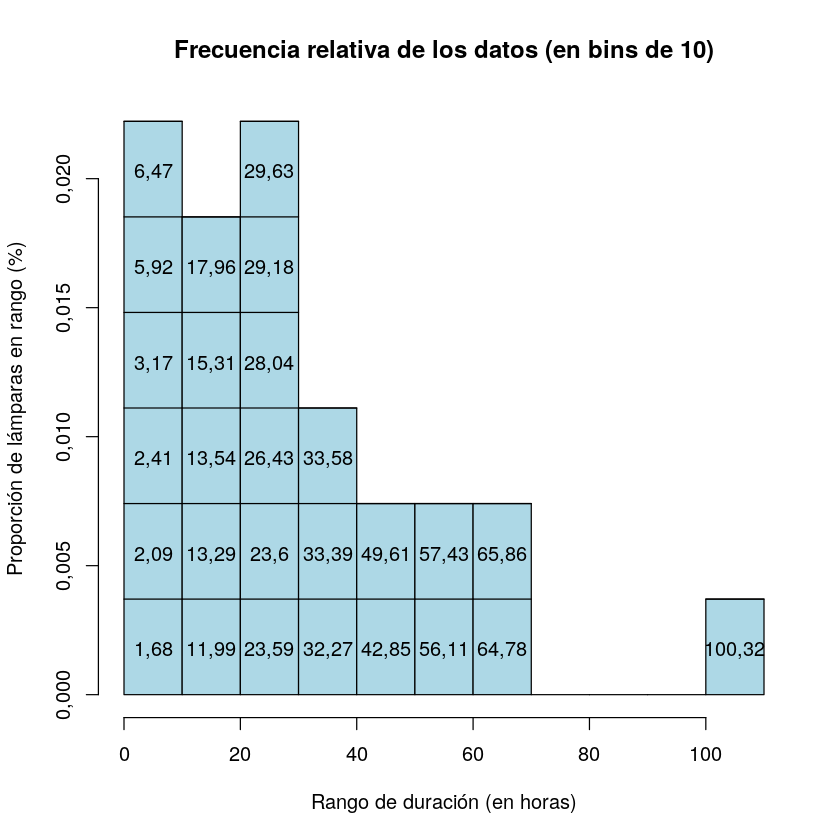

In [223]:
hist(datos,
     main="Frecuencia relativa de los datos (en bins de 10)",
     xlab="Rango de duración (en horas)",
     ylab="Proporción de lámparas en rango (%)",
     col="lightblue",
     freq=FALSE,
     breaks=11)

# Agrego divisiones
contador <- 0
for(n_div in c(1:11)){
    cant <- cantidad_en$cant[n_div]
    desde <- cantidad_en$bin_desde[n_div]
    hasta <- cantidad_en$bin_hasta[n_div]
    if(cant > 0){
        for (i in 1:cant){
            contador <- contador + 1
            # Segmentos para casilleros sobre hist
            segments(x0=desde, x1=hasta,
                     y0=(i * 1/27 * 1/10),
                     y1=(i * 1/27 * 1/10))
            # Etiquetas para casilleros
            text( (desde+hasta)/2, (i * 1/27 * 1/10) - 0.002 , sort(data)[contador])
        }
    }
}

La altura de cada celda de cada bin es `1/27 * 1/10`, pues:

* Si $altura_{celda} = \frac {1}{27} \times \frac {1}{10} $


* $ancho_{celda} = 10$


* Y $cantidad \ celdas$ (datos) = $27$

Entonces debe valer que

$$altura_{celda} \times ancho_{celda} \times cantidad \ celdas = 1$$


Por eso, para calcular la altura de cada celda, hacemos

$$altura_{celda} = \frac {1}{cantidad \ celdas} \times \frac {1}{ancho_{celda}}$$

Si queremos obtener la probabilidad de un $X_i > 30$, sumamos áreas de las celdas a la derecha del valor $30$

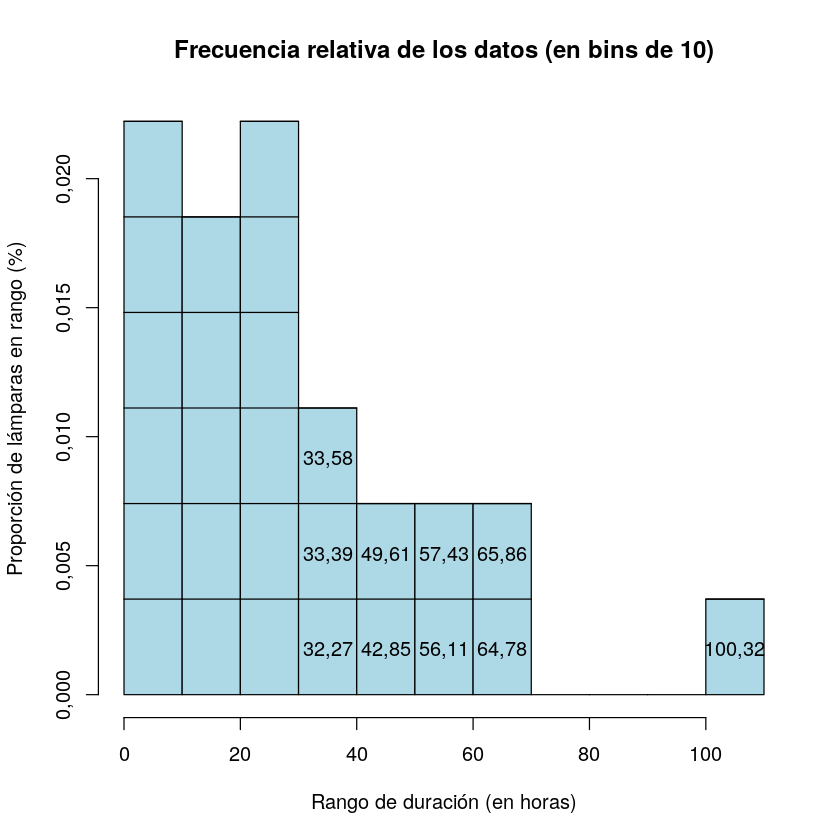

In [230]:
hist(datos,
     main="Frecuencia relativa de los datos (en bins de 10)",
     xlab="Rango de duración (en horas)",
     ylab="Proporción de lámparas en rango (%)",
     col="lightblue",
     freq=FALSE,
     breaks=11)

# Agrego divisiones
contador <- 1
for(n_div in c(1:11)){
    cant <- cantidad_en$cant[n_div]
    desde <- cantidad_en$bin_desde[n_div]
    hasta <- cantidad_en$bin_hasta[n_div]
    if(cant > 0){
        for (i in 1:cant){
            # Segmentos para casilleros sobre hist
            segments(x0=desde, x1=hasta,
                     y0=(i * 1/27 * 1/10),
                     y1=(i * 1/27 * 1/10))
            # Etiquetas para casilleros > 30
            if(sort(data)[contador] > 30){
                text( (desde+hasta)/2, (i * 1/27 * 1/10) - 0.002 , sort(data)[contador])
            }
            contador <- contador + 1
        }
    }
}

Como vimos antes, son 10 los valores mayores a $30$

Sabemos que el área de cada celda es $\frac 1 {27}$

Por lo que el área total de la función de densidad empírica integrando de 30 en adelante, será:

$$P_{emp}(X_i > 30) = 10 \times \frac {1} {27} = \frac {10} {27}$$

$$P_{emp}(X_i > 30) = \frac {10} {27}$$

**Observación:** Como era de esperarse, llegamos al mismo valor, pero a partir del **área** de una función.

> **c)** **Completar:** Estos datos permiten estimar que el **90 %** de las lámparas producidas
por esta fábrica **dura más** de . . . . . . horas y el **10 %** dura **menos** de . . . . . . horas.

#### Primero:

**Observemos** los datos intentando **deducir** una respuesta aproximada, (así de paso pensamos :)

In [248]:
sort(data)

[1]   1,68   2,09   2,41   3,17   5,92   6,47  11,99  13,29  13,54  15,31
[11]  17,96  23,59  23,60  26,43  28,04  29,18  29,63  32,27  33,39  33,58
[21]  42,85  49,61  56,11  57,43  64,78  65,86 100,32

Observemos *mejor* los datos

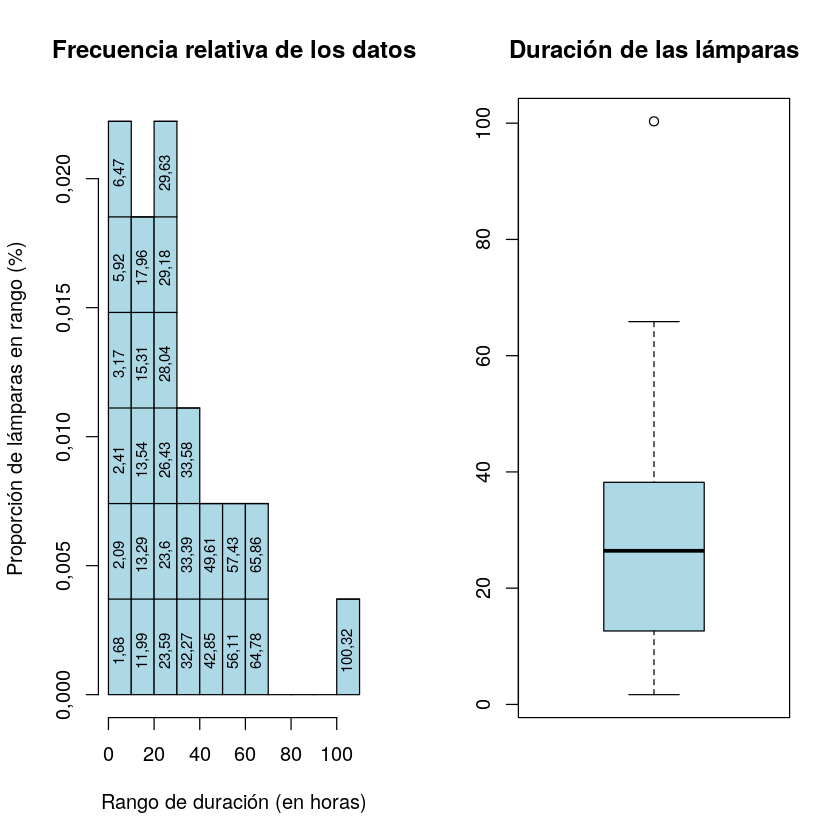

In [258]:
par(mfrow=c(1,2))
# Frecuencia de los datos
hist(datos,
     main="Frecuencia relativa de los datos",
     xlab="Rango de duración (en horas)",
     ylab="Proporción de lámparas en rango (%)",
     col="lightblue",
     freq=FALSE,
     breaks=11)

# Agrego divisiones
contador <- 0
for(n_div in c(1:11)){
    cant <- cantidad_en$cant[n_div]
    desde <- cantidad_en$bin_desde[n_div]
    hasta <- cantidad_en$bin_hasta[n_div]
    if(cant > 0){
        for (i in 1:cant){
            contador <- contador + 1
            # Segmentos para casilleros sobre hist
            segments(x0=desde, x1=hasta,
                     y0=(i * 1/27 * 1/10),
                     y1=(i * 1/27 * 1/10))
            # Etiquetas para casilleros
            text( (desde+hasta)/2, (i * 1/27 * 1/10) - 0.002 , sort(data)[contador],
                 cex=0.75, srt=90)
        }
    }
}
# Boxplot de datos
boxplot(datos,
        main="Duración de las lámparas",
        col="lightblue")


> *Estos datos permiten estimar que el `90 % de las lámparas` producidas por esta fábrica `dura más de`

Nos pide observar una **cota/*threshold*** a partir del cual el **90% de los datos** están **a su derecha**:


> ***el Percentil 10%***

In [239]:
quantile(data, probs=seq(0,1,0.1))

0%     10%     20%     30%     40%     50%     60%     70%     80%     90% 
  1,680   2,866   7,574  13,490  20,212  26,430  29,450  33,428  48,258  60,370 
   100% 
100,320

# Rta

| Respuesta|
|---|
| *Estos datos permiten estimar que el **90 % de las lámparas** producidas por esta fábrica **dura más de** $2.866$ horas* |

Equivalentemente, usando el ***90-percentil***:

| Respuesta|
|---|
| *y el **10 % dura menos de** $60.37$ horas* |


#### En $\mathcal{PALABRAS}$

Lo que intuitivamente tiene sentido, pues pedir ***"que el 90% sea mayor a"*** es ser muy exigente, de la misma forma que pedir que ***"solo el 10% sea menos de"***, igual a ***"solo el 90% sea mayor a"***, es muy laxo.

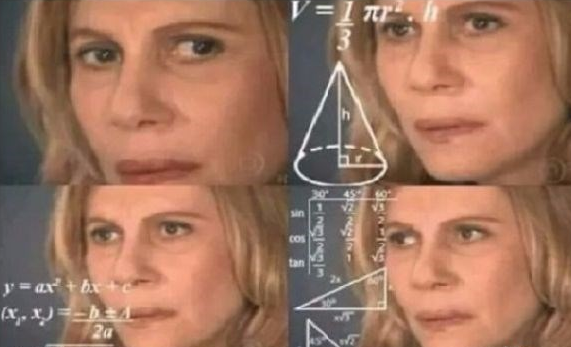

---

$$Fin$$

---